In [236]:
import matplotlib
import matplotlib.pyplot as plt
import rustworkx as rx
from rustworkx.visualization import mpl_draw as draw_graph
import numpy as np
from scipy.optimize import minimize
from collections import defaultdict
from typing import Sequence
 
 
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import QAOAAnsatz
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeWashingtonV2

from qiskit import QuantumCircuit

from qiskit.circuit.library import efficient_su2
from qiskit.circuit.library import TwoLocal
from qiskit.circuit.library import RealAmplitudes

In [237]:
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler

In [238]:
import numpy as np
import qubovert

In [239]:
data = np.load("sat.npz")
qubo_mat = data['qubo']
n_qubits = len(data['syms'])
print(data)
print(data['syms'])
print(qubo_mat)

NpzFile 'sat.npz' with keys: qubo, lvars, syms
['sat.$id00006.A' 'sat.$id00006.B' 'sat.$id00006.Y' 'sat.$id00004.A'
 'sat.$id00004.Y' 'sat.$id00005.A' 'sat.$id00005.B' 'sat.$id00005.Y'
 'sat.b' 'sat.c' 'sat.a']
[[ 4.  2. -4.  0.  0.  0.  0.  0.  0.  0. -8.]
 [ 0.  4. -4.  0. -8.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  2.  4.  0.  0. -8.  0.  0.  0.]
 [ 0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  6.  2. -4. -8.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  6. -4.  0. -8.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  4.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]


In [240]:
qubo = qubovert.utils.matrix_to_qubo(qubo_mat)
ising = qubovert.utils.qubo_to_quso(qubo)
qubo_dict = dict(qubo)
ising_dict = dict(ising)
print(ising_dict)
print(len(ising_dict))
ising_dict.pop(())
print(ising_dict)
print(len(ising_dict))
ising_mat = qubovert.utils.qubo_to_matrix(ising_dict)
print(ising_mat)

{(0,): np.float64(0.5), (): np.float64(10.0), (0, 1): np.float64(0.5), (1,): np.float64(0.5), (0, 2): np.float64(-1.0), (2,): np.float64(1.0), (0, 10): np.float64(-2.0), (1, 2): np.float64(-1.0), (1, 4): np.float64(-2.0), (3, 4): np.float64(1.0), (3, 7): np.float64(-2.0), (7,): np.float64(1.0), (5,): np.float64(-0.5), (5, 6): np.float64(0.5), (6,): np.float64(-0.5), (5, 7): np.float64(-1.0), (5, 8): np.float64(-2.0), (6, 7): np.float64(-1.0), (6, 9): np.float64(-2.0)}
19
{(0,): np.float64(0.5), (0, 1): np.float64(0.5), (1,): np.float64(0.5), (0, 2): np.float64(-1.0), (2,): np.float64(1.0), (0, 10): np.float64(-2.0), (1, 2): np.float64(-1.0), (1, 4): np.float64(-2.0), (3, 4): np.float64(1.0), (3, 7): np.float64(-2.0), (7,): np.float64(1.0), (5,): np.float64(-0.5), (5, 6): np.float64(0.5), (6,): np.float64(-0.5), (5, 7): np.float64(-1.0), (5, 8): np.float64(-2.0), (6, 7): np.float64(-1.0), (6, 9): np.float64(-2.0)}
18
[[ 0.5  0.5 -1.   0.   0.   0.   0.   0.   0.   0.  -2. ]
 [ 0.   0.5 

In [241]:
model_solution = qubo.solve_bruteforce()
print("Variable assignment:", model_solution)
print("Model value:", qubo.value(model_solution))
print("Constraints satisfied?", qubo.is_solution_valid(model_solution))

Variable assignment: {0: 1, 1: 1, 2: 1, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 1}
Model value: -6.0
Constraints satisfied? True


In [242]:
model_solution = ising.solve_bruteforce()
print("Variable assignment:", model_solution)
print("Model value:", ising.value(model_solution))
print("Constraints satisfied?", ising.is_solution_valid(model_solution))

Variable assignment: {0: -1, 1: -1, 2: -1, 3: 1, 4: -1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: -1}
Model value: -6.0
Constraints satisfied? True


In [243]:
ising2=qubovert.QUSO(ising_dict)
model_solution = ising2.solve_bruteforce()
print("Variable assignment:", model_solution)
print("Model value:", ising2.value(model_solution))
print("Constraints satisfied?", ising2.is_solution_valid(model_solution))

Variable assignment: {0: -1, 1: -1, 2: -1, 10: -1, 4: -1, 3: 1, 7: 1, 5: 1, 6: 1, 8: 1, 9: 1}
Model value: -16.0
Constraints satisfied? True


In [244]:
def build_paulis(matrix):
    pauli_list = []
    for i in range(len(matrix)):
        pauli_list.append(("Z", [i], matrix[i][i]))
        for j in range(i+1, len(matrix)):
            pauli_list.append(("ZZ", [i, j], matrix[i][j]))
    return pauli_list
 
 
sat_paulis = build_paulis(ising_mat)
print(sat_paulis)
cost_hamiltonian = SparsePauliOp.from_sparse_list(sat_paulis, n_qubits)
print("Cost Function Hamiltonian:", cost_hamiltonian)

[('Z', [0], np.float64(0.5)), ('ZZ', [0, 1], np.float64(0.5)), ('ZZ', [0, 2], np.float64(-1.0)), ('ZZ', [0, 3], np.float64(0.0)), ('ZZ', [0, 4], np.float64(0.0)), ('ZZ', [0, 5], np.float64(0.0)), ('ZZ', [0, 6], np.float64(0.0)), ('ZZ', [0, 7], np.float64(0.0)), ('ZZ', [0, 8], np.float64(0.0)), ('ZZ', [0, 9], np.float64(0.0)), ('ZZ', [0, 10], np.float64(-2.0)), ('Z', [1], np.float64(0.5)), ('ZZ', [1, 2], np.float64(-1.0)), ('ZZ', [1, 3], np.float64(0.0)), ('ZZ', [1, 4], np.float64(-2.0)), ('ZZ', [1, 5], np.float64(0.0)), ('ZZ', [1, 6], np.float64(0.0)), ('ZZ', [1, 7], np.float64(0.0)), ('ZZ', [1, 8], np.float64(0.0)), ('ZZ', [1, 9], np.float64(0.0)), ('ZZ', [1, 10], np.float64(0.0)), ('Z', [2], np.float64(1.0)), ('ZZ', [2, 3], np.float64(0.0)), ('ZZ', [2, 4], np.float64(0.0)), ('ZZ', [2, 5], np.float64(0.0)), ('ZZ', [2, 6], np.float64(0.0)), ('ZZ', [2, 7], np.float64(0.0)), ('ZZ', [2, 8], np.float64(0.0)), ('ZZ', [2, 9], np.float64(0.0)), ('ZZ', [2, 10], np.float64(0.0)), ('Z', [3], np.

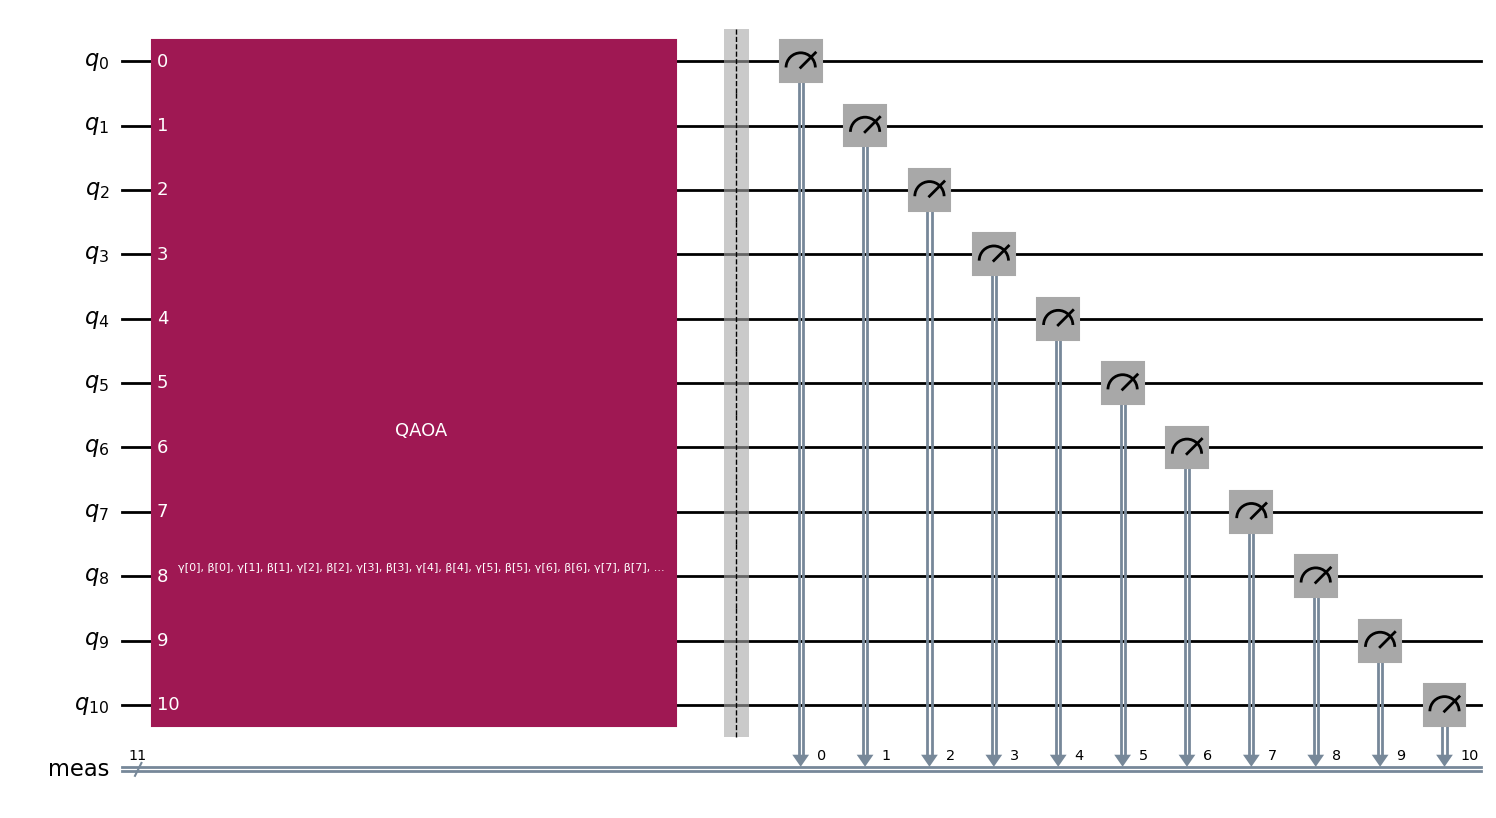

In [245]:
ansatz = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=10)
ansatz.measure_all()
ansatz.draw("mpl")

In [246]:
backend = AerSimulator()
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

candidate_circuit = pm.run(ansatz)
candidate_circuit.draw("mpl", fold=False, idle_wires=False)

In [247]:
init_params = np.random.rand(ansatz.num_parameters) * 2 * np.pi

In [248]:
objective_func_vals = []  # Global variable

In [249]:
def cost_func_estimator(params, ansatz, hamiltonian, estimator):
    # transform the observable defined on virtual qubits to
    # an observable defined on all physical qubits
    isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)
 
    pub = (ansatz, isa_hamiltonian, params)
    job = estimator.run([pub])
 
    results = job.result()[0]
    cost = results.data.evs
 
    objective_func_vals.append(cost)
 
    return cost

In [250]:

with Session(backend=backend) as session:
    # If using qiskit-ibm-runtime<0.24.0, change `mode=` to `session=`
    estimator = Estimator(mode=session)
    estimator.options.default_shots = 1000
 
    # Set simple error suppression/mitigation options
    #estimator.options.dynamical_decoupling.enable = True
    #estimator.options.dynamical_decoupling.sequence_type = "XY4"
    #estimator.options.twirling.enable_gates = True
    #estimator.options.twirling.num_randomizations = "auto"
 
    result = minimize(
        cost_func_estimator,
        init_params,
        args=(candidate_circuit, cost_hamiltonian, estimator),
        method="COBYLA",
        tol=1e-2,
    )
    print(result)

 message: Return from COBYLA because the trust region radius reaches its lower bound.
 success: True
  status: 0
     fun: -8.775224775224775
       x: [ 5.630e+00  3.022e+00 ...  5.991e+00  2.245e+00]
    nfev: 127
   maxcv: 0.0


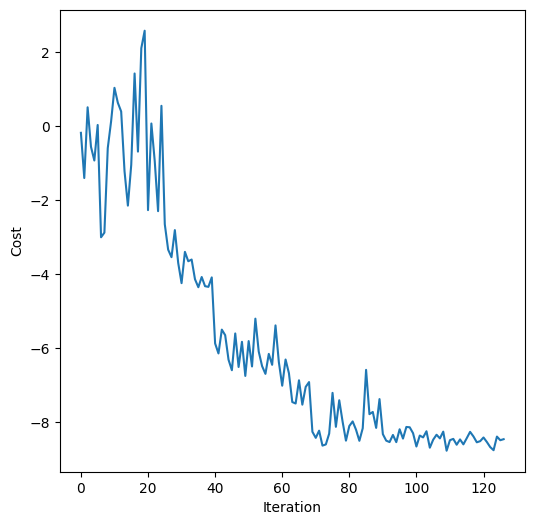

In [267]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(objective_func_vals)
plt.xlabel("Iteration")
plt.ylabel("Cost")
fig.savefig("asd2.pdf", format="pdf")
plt.show()

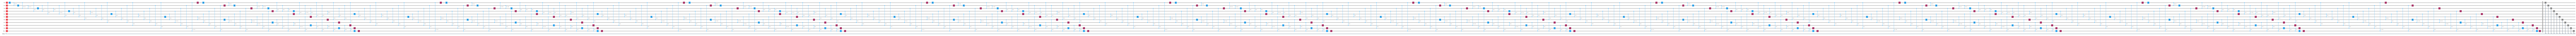

In [252]:
optimized_circuit = candidate_circuit.assign_parameters(result.x)
optimized_circuit.draw("mpl", fold=False, idle_wires=False)

In [253]:
# If using qiskit-ibm-runtime<0.24.0, change `mode=` to `backend=`
sampler = Sampler(mode=backend)
sampler.options.default_shots = 10000
 
# Set simple error suppression/mitigation options
#sampler.options.dynamical_decoupling.enable = True
#sampler.options.dynamical_decoupling.sequence_type = "XY4"
#sampler.options.twirling.enable_gates = True
#sampler.options.twirling.num_randomizations = "auto"
 
pub = (optimized_circuit,)
job = sampler.run([pub], shots=int(1e4))
counts_int = job.result()[0].data.meas.get_int_counts()
counts_bin = job.result()[0].data.meas.get_counts()
shots = sum(counts_int.values())
final_distribution_int = {key: val / shots for key, val in counts_int.items()}
final_distribution_bin = {key: val / shots for key, val in counts_bin.items()}
print(final_distribution_int)

{1661: 0.0003, 1055: 0.0458, 1047: 0.0807, 1453: 0.0045, 1889: 0.0017, 1094: 0.0002, 1741: 0.0071, 1471: 0.0336, 1759: 0.0345, 1025: 0.0209, 1375: 0.0013, 1029: 0.0267, 1048: 0.0012, 1911: 0.0099, 1031: 0.0388, 1445: 0.0059, 306: 0.0013, 292: 0.0004, 4: 0.0064, 1528: 0.0001, 712: 0.003, 446: 0.0078, 0: 0.014, 30: 0.0131, 1053: 0.0078, 733: 0.0013, 720: 0.0004, 18: 0.0161, 1037: 0.0015, 24: 0.0003, 994: 0.0001, 1455: 0.0032, 1527: 0.0014, 1030: 0.0077, 1036: 0.0012, 2015: 0.0028, 8: 0.0022, 1046: 0.0103, 1183: 0.0163, 730: 0.0064, 1733: 0.006, 1028: 0.0041, 1754: 0.0005, 1157: 0.0003, 734: 0.0064, 1465: 0.0013, 1919: 0.0031, 2: 0.0103, 1747: 0.0007, 320: 0.0001, 50: 0.0002, 1758: 0.0032, 1462: 0.0006, 1303: 0.0059, 719: 0.0011, 1467: 0.0013, 6: 0.0069, 1285: 0.0026, 428: 0.0027, 1542: 0.0006, 1629: 0.0009, 1269: 0.0001, 1255: 0.0007, 1317: 0.0016, 1751: 0.0072, 34: 0.0008, 1607: 0.0028, 1742: 0.0009, 1022: 0.0006, 2031: 0.0006, 20: 0.0029, 60: 0.0001, 1041: 0.0007, 1448: 0.0004, 1343: 0

In [254]:
# auxiliary functions to sample most likely bitstring
def to_bitstring(integer, num_bits):
    result = np.binary_repr(integer, width=num_bits)
    return [int(digit) for digit in result]
 
 
keys = list(final_distribution_int.keys())
values = list(final_distribution_int.values())
most_likely = keys[np.argmax(np.abs(values))]
most_likely_bitstring = to_bitstring(most_likely, len(data['syms']))
most_likely_bitstring.reverse()
 
print("Result bitstring:", most_likely_bitstring)

Result bitstring: [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1]


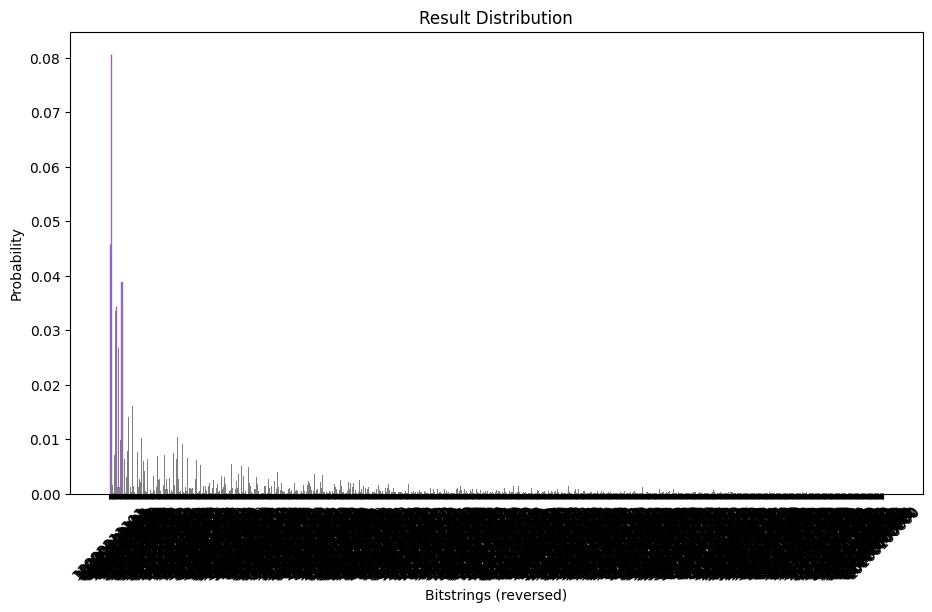

In [263]:
matplotlib.rcParams.update({"font.size": 10})
final_bits = final_distribution_bin
values = np.abs(list(final_bits.values()))
top_4_values = sorted(values, reverse=True)[:4]
positions = []
for value in top_4_values:
    positions.append(np.where(values == value)[0])
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(1, 1, 1)
plt.xticks(rotation=45)
plt.title("Result Distribution")
plt.xlabel("Bitstrings (reversed)")
plt.ylabel("Probability")
ax.bar(list(final_bits.keys()), list(final_bits.values()), color="tab:grey")
for p in positions:
    ax.get_children()[int(p[0])].set_color("tab:purple")
fig.savefig("asd2.pdf", format="pdf")
plt.show()

In [256]:
print(final_distribution_bin)
last_3 = {}
first_3 = {}
for (key, value) in final_distribution_bin.items():
    last = key[-3:]
    first = key[:3]
    if last in last_3.keys():
        last_3[last] += value
    else:
        last_3[last] = value
    if first in first_3.keys():
        first_3[first] += value
    else:
        first_3[first] = value

{'11001111101': 0.0003, '10000011111': 0.0458, '10000010111': 0.0807, '10110101101': 0.0045, '11101100001': 0.0017, '10001000110': 0.0002, '11011001101': 0.0071, '10110111111': 0.0336, '11011011111': 0.0345, '10000000001': 0.0209, '10101011111': 0.0013, '10000000101': 0.0267, '10000011000': 0.0012, '11101110111': 0.0099, '10000000111': 0.0388, '10110100101': 0.0059, '00100110010': 0.0013, '00100100100': 0.0004, '00000000100': 0.0064, '10111111000': 0.0001, '01011001000': 0.003, '00110111110': 0.0078, '00000000000': 0.014, '00000011110': 0.0131, '10000011101': 0.0078, '01011011101': 0.0013, '01011010000': 0.0004, '00000010010': 0.0161, '10000001101': 0.0015, '00000011000': 0.0003, '01111100010': 0.0001, '10110101111': 0.0032, '10111110111': 0.0014, '10000000110': 0.0077, '10000001100': 0.0012, '11111011111': 0.0028, '00000001000': 0.0022, '10000010110': 0.0103, '10010011111': 0.0163, '01011011010': 0.0064, '11011000101': 0.006, '10000000100': 0.0041, '11011011010': 0.0005, '10010000101'

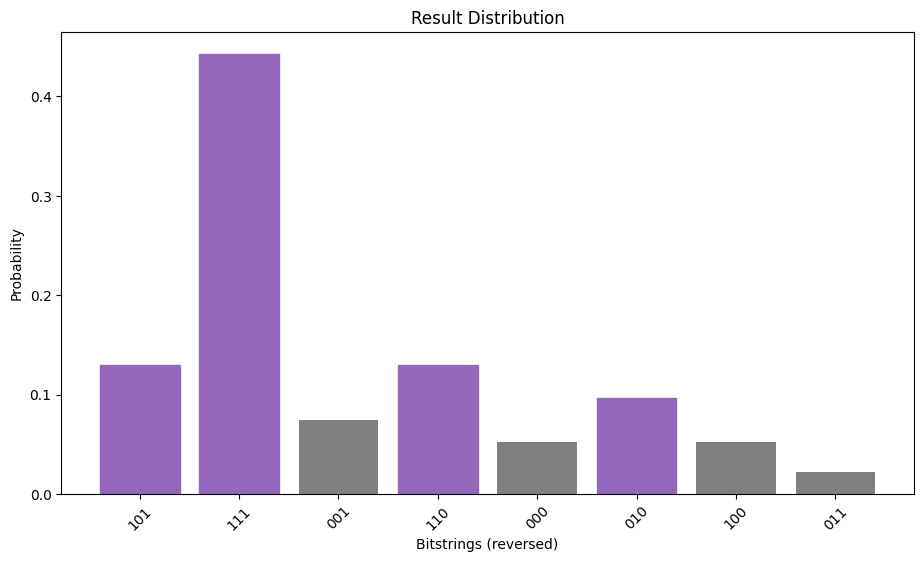

In [257]:
matplotlib.rcParams.update({"font.size": 10})
final_bits = last_3
values = np.abs(list(final_bits.values()))
top_4_values = sorted(values, reverse=True)[:4]
positions = []
for value in top_4_values:
    positions.append(np.where(values == value)[0])
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(1, 1, 1)
plt.xticks(rotation=45)
plt.title("Result Distribution")
plt.xlabel("Bitstrings (reversed)")
plt.ylabel("Probability")
ax.bar(list(final_bits.keys()), list(final_bits.values()), color="tab:grey")
for p in positions:
    ax.get_children()[int(p[0])].set_color("tab:purple")
plt.show()

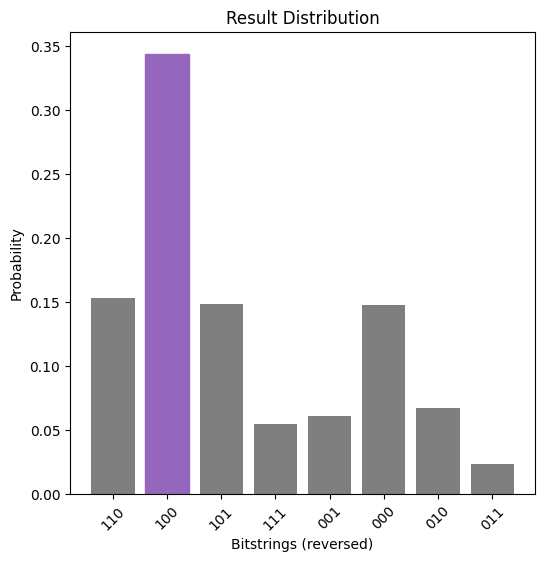

In [269]:
matplotlib.rcParams.update({"font.size": 10})
final_bits = first_3
values = np.abs(list(final_bits.values()))
top_1_values = sorted(values, reverse=True)[:1]
positions = []
for value in top_1_values:
    positions.append(np.where(values == value)[0])
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
plt.xticks(rotation=45)
plt.title("Result Distribution")
plt.xlabel("Bitstrings (reversed)")
plt.ylabel("Probability")
ax.bar(list(final_bits.keys()), list(final_bits.values()), color="tab:grey")
for p in positions:
    ax.get_children()[int(p[0])].set_color("tab:purple")
fig.savefig("asd3.pdf", format="pdf")
plt.show()

In [261]:
ansatz.draw("mpl").savefig("asd.pdf", format="pdf")